# Figure 1. Optogenetic stimuli generate large single cell responses but weakly modulate population activity




In [11]:
%reset
#%qtconsole
%load_ext autoreload
%autoreload 2
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.stats as stats


data_monkeys=np.loadtxt('Monkeys_with_trials.txt');
data_mice=np.loadtxt('Mice_with_trials.txt');


# structure of data set is:
# unit number, contrast, laser, rate, other stuff

DATA=[data_mice,data_monkeys]
species=['Mice','Monkeys']
color=['c','m']
bin_edges=np.arange(-300,300,0.1) 
bin_means=(bin_edges[1::]+bin_edges[0:-1])/2   


area=4.0;linethicknes=1.0;
font = {'family' : 'normal','weight' : 'normal','size'   : 7, 'family':'serif','serif':['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] =linethicknes
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42

N_stat=10**5;

def phi(x):
    return (0.5*(x+np.abs(x)))


Once deleted, variables cannot be recovered. Proceed (y/[n])? y
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
for idx_species in [0,1]:
    data=DATA[idx_species]
    Con=np.unique(data[:,1])
    print(Con)

[ 0.  8. 13. 21. 34. 55. 90.]
[ 0.  6. 12. 25. 50. 99.]


<ipython-input-35-3fcd19efb9f8>:67: MatplotlibDeprecationWarning: The 'linthreshx' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axs[3*idx+idx_species].set_xscale('symlog', linthreshx=12)
<ipython-input-35-3fcd19efb9f8>:67: MatplotlibDeprecationWarning: The 'linthreshx' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axs[3*idx+idx_species].set_xscale('symlog', linthreshx=12)
<ipython-input-35-3fcd19efb9f8>:67: MatplotlibDeprecationWarning: The 'linthreshx' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axs[3*idx+idx_species].set_xscale('symlog', linthreshx=12)
<ipython-input-35-3fcd19efb9f8>:67: MatplotlibDeprecationWarning: The 'linthreshx' parameter of __init__() has been renamed 'linthresh' since 

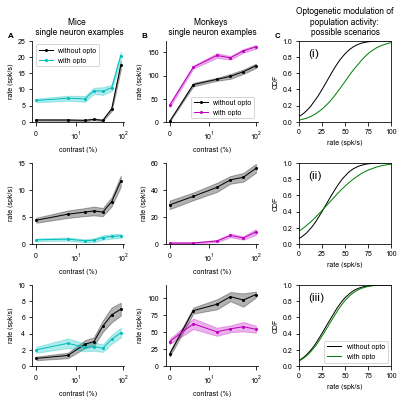

In [35]:
rows=3
cols=3
#fig, axs = plt.subplots(rows,columns, figsize=(8.5,11), facecolor='w', edgecolor='k')
fig, axs = plt.subplots(rows,columns, figsize=(1.875*cols,1.875*rows), 
                        facecolor='w', edgecolor='k')#,sharex='col')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()


axs[0].text(-.2, 1.1,'A', transform=axs[0].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[1].text(-.2, 1.1,'B', transform=axs[1].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[2].text(-.2, 1.1,'C', transform=axs[2].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
#axs[6].text(-.2, 1.1,'D', transform=axs[5].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
#axs[8].text(-.2, 1.1,'E', transform=axs[8].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');


for idx in [0,1,3,4,6,7]:
    axs[idx].spines['top'].set_visible(False)
    axs[idx].spines['right'].set_visible(False)

    
idx_laser=-1
for idx_species in [0,1]:
    data=DATA[idx_species]
    Con=np.unique(data[:,1])
    Las=np.unique(data[:,2])
    cells_id=np.unique(data[:,0]);

    Cell=[];Contrast=[];Base=[];Resp=[];eBase=[];eResp=[];

    for idx_cell in range(len(cells_id)):
        for idx_con in range(len(Con)):
            mask_no_L=(data[:,0]==cells_id[idx_cell])&(data[:,2]==Las[0])&(data[:,1]==Con[idx_con])
            mask_L=(data[:,0]==cells_id[idx_cell])&(data[:,2]==Las[idx_laser])&(data[:,1]==Con[idx_con])
            Cell=Cell+[idx_cell]
            Contrast=Contrast+[data[mask_L,1]]
            Trial_Base=data[mask_no_L,3::]
            Trial_Resp=data[mask_L,3::]
            Base=Base+[np.mean(Trial_Base[np.isnan(Trial_Base)==False])]
            Resp=Resp+[np.mean(Trial_Resp[np.isnan(Trial_Resp)==False])]
            eBase=eBase+[stats.sem(Trial_Base[np.isnan(Trial_Base)==False])]
            eResp=eResp+[stats.sem(Trial_Resp[np.isnan(Trial_Resp)==False])]

    Cell,Contrast,Base,Resp=np.asarray(Cell),np.asarray(Contrast),np.asarray(Base),np.asarray(Resp)
    eBase,eResp=np.asarray(eBase),np.asarray(eResp)

    
    # Panels A: example cells
    if idx_species==0:
        ymax=[25,15,10]
        example_cells=[25,45,49]
        title='Mice \n single neuron examples'
    if idx_species==1:
        ymax=[175,60,120]
        example_cells=[0,21,54]
        title='Monkeys \n single neuron examples'
    axs[idx_species].set_title(title)    
    for idx in range(3):
        mask=Cell==example_cells[idx]
        axs[3*idx+idx_species].plot(Contrast[mask],Base[mask],marker='o',c='k',markersize=2,label='without opto')
        axs[3*idx+idx_species].plot(Contrast[mask],Resp[mask],marker='o',c=color[idx_species],markersize=2,label='with opto')
        axs[3*idx+idx_species].fill_between(Con,Base[mask]-eBase[mask],Base[mask]+eBase[mask],color='k',alpha=0.3)
        axs[3*idx+idx_species].fill_between(Con,Resp[mask]-eResp[mask],Resp[mask]+eResp[mask],color=color[idx_species],alpha=0.3)
        #axs[3*idx+idx_species].errorbar(Contrast[mask],Base[mask],eBase[mask],marker='o',c='k',markersize=2)
        #axs[3*idx+idx_species].errorbar(Contrast[mask],Resp[mask],eResp[mask],marker='o',c=color[idx_species],markersize=2)
        
        axs[3*idx+idx_species].set_xscale('symlog', linthreshx=12)
        axs[3*idx+idx_species].axis([-1.,110,0,ymax[idx]])
        axs[3*idx+idx_species].set_ylabel('rate (spk/s)')
        axs[3*idx+idx_species].set_xlabel('contrast (%)')

    
axs[0].legend(loc='best')
axs[1].legend(loc='best')
    
    
mu=30;S_mu=20;
text=['(i)','(ii)','(iii)']
for idx_cases in range(3):
    if idx_cases==0:
        delta_mu=20;S_delta_mu=15;Cov_mu_delta_mu=0;
    if idx_cases==1:
        delta_mu=2;S_delta_mu=25;Cov_mu_delta_mu=0;
    if idx_cases==2:
        delta_mu=2;S_delta_mu=30;Cov_mu_delta_mu=-0.48*S_delta_mu**2;

    Mean_Mat=[mu,delta_mu]
    Cov_Mat=np.zeros((2,2))
    Cov_Mat[0,0],Cov_Mat[1,1]=S_mu**2,S_delta_mu**2
    Cov_Mat[1,0],Cov_Mat[0,1]=Cov_mu_delta_mu,Cov_mu_delta_mu
    mu_i, delta_mu_i = np.random.multivariate_normal(Mean_Mat, Cov_Mat, N_stat).T
    r_i=phi(mu_i)
    r_L_i=phi(mu_i+delta_mu_i)
    delta_r_i=r_L_i-r_i


    hist=np.histogram(r_i,bin_edges,density=True)
    axs[3*idx_cases+2].plot(bin_means,np.cumsum(hist[0])*np.diff(bin_edges),c='k',label='without opto')
    hist=np.histogram(r_L_i,bin_edges,density=True)
    axs[3*idx_cases+2].plot(bin_means,np.cumsum(hist[0])*np.diff(bin_edges),c='g',label='with opto')
    axs[3*idx_cases+2].axis([0,100,0,1])

    axs[3*idx_cases+2].set_xlabel('rate (spk/s)')
    axs[3*idx_cases+2].set_ylabel('CDF')
    if idx_cases==2:
        axs[3*idx_cases+2].legend(loc='lower right')
    axs[3*idx_cases+2].text(10,0.8,text[idx_cases], fontsize=12)

axs[2].set_title('Optogenetic modulation of\npopulation activity: \npossible scenarios')    
plt.tight_layout()
fig.set_size_inches(1.875*cols,1.875*rows)
pic_name='Figure_1.pdf'
fig.savefig(pic_name,format='pdf',bbox_inches='tight')
pic_name='Figure_1.png'
fig.savefig(pic_name,format='png',bbox_inches='tight', dpi=300)

    
    

In [19]:
1.875*cols*2.54,1.875*rows*2.54

(14.2875, 14.2875)

In [20]:
1.875/2.5*2

1.5

<ipython-input-134-3830453c29d3>:67: MatplotlibDeprecationWarning: The 'linthreshx' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axs[4*idx+idx_species].set_xscale('symlog', linthreshx=12)
<ipython-input-134-3830453c29d3>:67: MatplotlibDeprecationWarning: The 'linthreshx' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axs[4*idx+idx_species].set_xscale('symlog', linthreshx=12)
<ipython-input-134-3830453c29d3>:67: MatplotlibDeprecationWarning: The 'linthreshx' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axs[4*idx+idx_species].set_xscale('symlog', linthreshx=12)
<ipython-input-134-3830453c29d3>:67: MatplotlibDeprecationWarning: The 'linthreshx' parameter of __init__() has been renamed 'linthresh' si

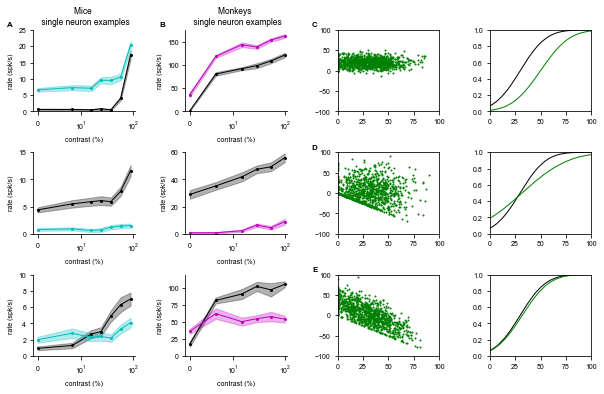

In [134]:
rows=3
columns=4
#fig, axs = plt.subplots(rows,columns, figsize=(8.5,11), facecolor='w', edgecolor='k')
fig, axs = plt.subplots(rows,columns, figsize=(2.5*columns,2.*rows), 
                        facecolor='w', edgecolor='k')#,sharex='col')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()


axs[0].text(-.2, 1.1,'A', transform=axs[0].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[1].text(-.2, 1.1,'B', transform=axs[1].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[2].text(-.2, 1.1,'C', transform=axs[2].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[6].text(-.2, 1.1,'D', transform=axs[6].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[8].text(-.2, 1.1,'E', transform=axs[10].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');


for idx in [0,1,4,5,8,9]:
    axs[idx].spines['top'].set_visible(False)
    axs[idx].spines['right'].set_visible(False)

    
idx_laser=-1
for idx_species in [0,1]:
    data=DATA[idx_species]
    Con=np.unique(data[:,1])
    Las=np.unique(data[:,2])
    cells_id=np.unique(data[:,0]);

    Cell=[];Contrast=[];Base=[];Resp=[];eBase=[];eResp=[];

    for idx_cell in range(len(cells_id)):
        for idx_con in range(len(Con)):
            mask_no_L=(data[:,0]==cells_id[idx_cell])&(data[:,2]==Las[0])&(data[:,1]==Con[idx_con])
            mask_L=(data[:,0]==cells_id[idx_cell])&(data[:,2]==Las[idx_laser])&(data[:,1]==Con[idx_con])
            Cell=Cell+[idx_cell]
            Contrast=Contrast+[data[mask_L,1]]
            Trial_Base=data[mask_no_L,3::]
            Trial_Resp=data[mask_L,3::]
            Base=Base+[np.mean(Trial_Base[np.isnan(Trial_Base)==False])]
            Resp=Resp+[np.mean(Trial_Resp[np.isnan(Trial_Resp)==False])]
            eBase=eBase+[stats.sem(Trial_Base[np.isnan(Trial_Base)==False])]
            eResp=eResp+[stats.sem(Trial_Resp[np.isnan(Trial_Resp)==False])]

    Cell,Contrast,Base,Resp=np.asarray(Cell),np.asarray(Contrast),np.asarray(Base),np.asarray(Resp)
    eBase,eResp=np.asarray(eBase),np.asarray(eResp)

    
    # Panels A: example cells
    if idx_species==0:
        ymax=[25,15,10]
        example_cells=[25,45,49]
        title='Mice \n single neuron examples'
    if idx_species==1:
        ymax=[175,60,120]
        example_cells=[0,21,54]
        title='Monkeys \n single neuron examples'
    axs[idx_species].set_title(title)    
    for idx in range(3):
        mask=Cell==example_cells[idx]
        axs[4*idx+idx_species].plot(Contrast[mask],Base[mask],marker='o',c='k',markersize=2)
        axs[4*idx+idx_species].plot(Contrast[mask],Resp[mask],marker='o',c=color[idx_species],markersize=2)
        axs[4*idx+idx_species].fill_between(Con,Base[mask]-eBase[mask],Base[mask]+eBase[mask],color='k',alpha=0.3)
        axs[4*idx+idx_species].fill_between(Con,Resp[mask]-eResp[mask],Resp[mask]+eResp[mask],color=color[idx_species],alpha=0.3)
        #axs[4*idx+idx_species].errorbar(Contrast[mask],Base[mask],eBase[mask],marker='o',c='k',markersize=2)
        #axs[4*idx+idx_species].errorbar(Contrast[mask],Resp[mask],eResp[mask],marker='o',c=color[idx_species],markersize=2)
        
        axs[4*idx+idx_species].set_xscale('symlog', linthreshx=12)
        axs[4*idx+idx_species].axis([-1.,110,0,ymax[idx]])
        axs[4*idx+idx_species].set_ylabel('rate (spk/s)')
        axs[4*idx+idx_species].set_xlabel('contrast (%)')

    
    
    
mu=30;S_mu=20;
for idx_cases in range(3):
    if idx_cases==0:
        delta_mu=20;S_delta_mu=10;Cov_mu_delta_mu=0;
    if idx_cases==1:
        delta_mu=2;S_delta_mu=30;Cov_mu_delta_mu=0;
    if idx_cases==2:
        delta_mu=2;S_delta_mu=30;Cov_mu_delta_mu=-0.48*S_delta_mu**2;

    Mean_Mat=[mu,delta_mu]
    Cov_Mat=np.zeros((2,2))
    Cov_Mat[0,0],Cov_Mat[1,1]=S_mu**2,S_delta_mu**2
    Cov_Mat[1,0],Cov_Mat[0,1]=Cov_mu_delta_mu,Cov_mu_delta_mu
    mu_i, delta_mu_i = np.random.multivariate_normal(Mean_Mat, Cov_Mat, N_stat).T
    r_i=phi(mu_i)
    r_L_i=phi(mu_i+delta_mu_i)
    delta_r_i=r_L_i-r_i

    axs[4*idx_cases+2].scatter(r_i[0:10**3],delta_r_i[0:10**3],c='g',s=1,alpha=1.)
    axs[4*idx_cases+2].axis([0,100,-100,100])
    hist=np.histogram(r_i,bin_edges,density=True)
    axs[4*idx_cases+3].plot(bin_means,np.cumsum(hist[0])*np.diff(bin_edges),c='k')
    hist=np.histogram(r_L_i,bin_edges,density=True)
    axs[4*idx_cases+3].plot(bin_means,np.cumsum(hist[0])*np.diff(bin_edges),c='g')
    axs[4*idx_cases+3].axis([0,100,0,1])





(0.0, 100.0, 0.0, 1.0)

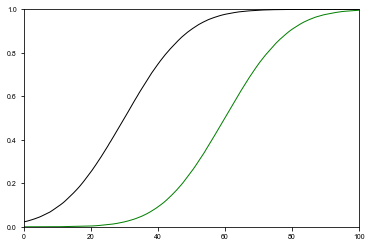

(0.0, 100.0, 0.0, 1.0)

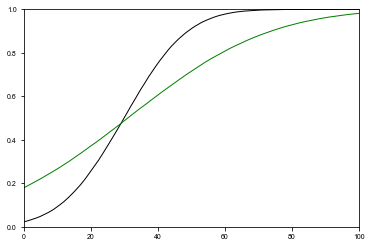

In [93]:
delta_mu=1
S_delta_mu=30
Cov_mu_delta_mu=0

Mean_Mat=[mu,delta_mu]
Cov_Mat=np.zeros((2,2))
Cov_Mat[0,0],Cov_Mat[1,1]=S_mu**2,S_delta_mu**2
Cov_Mat[1,0],Cov_Mat[0,1]=Cov_mu_delta_mu,Cov_mu_delta_mu
mu_i, delta_mu_i = np.random.multivariate_normal(Mean_Mat, Cov_Mat, N_stat).T
r_i=phi(mu_i)
r_L_i=phi(mu_i+delta_mu_i)
delta_r_i=r_L_i-r_i

hist=np.histogram(r_i,bin_edges,density=True)
plt.plot(bin_means,np.cumsum(hist[0])*np.diff(bin_edges),c='k')
hist=np.histogram(r_L_i,bin_edges,density=True)
plt.plot(bin_means,np.cumsum(hist[0])*np.diff(bin_edges),c='g')
plt.axis([0,100,0,1])

(0.0, 100.0, 0.0, 1.0)

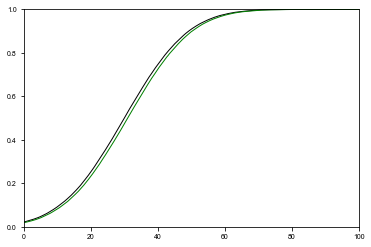

In [94]:
delta_mu=1
S_delta_mu=1
Cov_mu_delta_mu=0

Mean_Mat=[mu,delta_mu]
Cov_Mat=np.zeros((2,2))
Cov_Mat[0,0],Cov_Mat[1,1]=S_mu**2,S_delta_mu**2
Cov_Mat[1,0],Cov_Mat[0,1]=Cov_mu_delta_mu,Cov_mu_delta_mu
mu_i, delta_mu_i = np.random.multivariate_normal(Mean_Mat, Cov_Mat, N_stat).T
r_i=phi(mu_i)
r_L_i=phi(mu_i+delta_mu_i)
delta_r_i=r_L_i-r_i

hist=np.histogram(r_i,bin_edges,density=True)
plt.plot(bin_means,np.cumsum(hist[0])*np.diff(bin_edges),c='k')
hist=np.histogram(r_L_i,bin_edges,density=True)
plt.plot(bin_means,np.cumsum(hist[0])*np.diff(bin_edges),c='g')
plt.axis([0,100,0,1])

<ipython-input-7-42fc1c039d9b>:104: MatplotlibDeprecationWarning: The 'linthreshx' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  Panel[idx].set_xscale('symlog', linthreshx=12)
<ipython-input-7-42fc1c039d9b>:104: MatplotlibDeprecationWarning: The 'linthreshx' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  Panel[idx].set_xscale('symlog', linthreshx=12)
<ipython-input-7-42fc1c039d9b>:104: MatplotlibDeprecationWarning: The 'linthreshx' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  Panel[idx].set_xscale('symlog', linthreshx=12)
<ipython-input-7-42fc1c039d9b>:144: MatplotlibDeprecationWarning: The 'linthreshx' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old 

0.012463291915273395
0.025719185832896493
0.03183715850716887
0.019971873397729562
0.013726885555950861
0.00011288224491423637
0.0014835413861532531
0.001646044289029036
0.0019222337355288
0.0004300295747351468
0.02880374629504945
2.9251119304518625e-08
0.020384888933683065


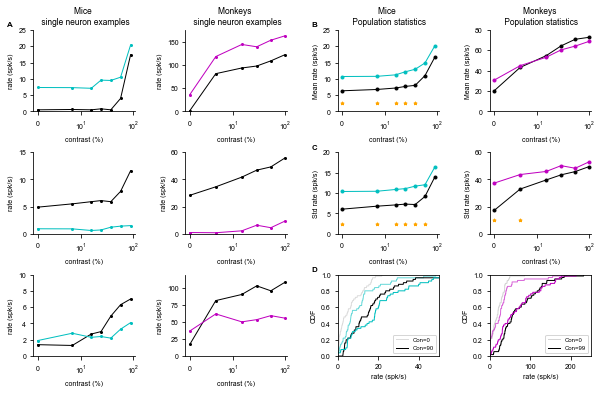

In [7]:
rows=3
columns=4
#fig, axs = plt.subplots(rows,columns, figsize=(8.5,11), facecolor='w', edgecolor='k')
fig, axs = plt.subplots(rows,columns, figsize=(2.5*columns,2.*rows), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()

for idx in range(rows*columns):
    axs[idx].set_visible(False);
    
Panel_Atop1 = plt.subplot2grid((rows,columns), (0,0), rowspan=1, colspan=1);
Panel_Atop1.text(-.2, 1.1,'A', transform=Panel_Atop1.transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
Panel_Atop1.spines['top'].set_visible(False)
Panel_Atop1.spines['right'].set_visible(False)
#Panel_Atop1.get_xaxis().set_visible(False)

Panel_Amiddle1 = plt.subplot2grid((rows,columns), (1,0), rowspan=1, colspan=1);
Panel_Amiddle1.spines['top'].set_visible(False)
Panel_Amiddle1.spines['right'].set_visible(False)
#Panel_Amiddle1.get_xaxis().set_visible(False)

Panel_Abottom1 = plt.subplot2grid((rows,columns), (2,0), rowspan=1, colspan=1);
Panel_Abottom1.spines['top'].set_visible(False)
Panel_Abottom1.spines['right'].set_visible(False)

Panel_Atop2 = plt.subplot2grid((rows,columns), (0,1), rowspan=1, colspan=1);
Panel_Atop2.spines['top'].set_visible(False)
Panel_Atop2.spines['right'].set_visible(False)
#Panel_Atop2.get_xaxis().set_visible(False)

Panel_Amiddle2 = plt.subplot2grid((rows,columns), (1,1), rowspan=1, colspan=1);
Panel_Amiddle2.spines['top'].set_visible(False)
Panel_Amiddle2.spines['right'].set_visible(False)
#Panel_Amiddle2.get_xaxis().set_visible(False)

Panel_Abottom2 = plt.subplot2grid((rows,columns), (2,1), rowspan=1, colspan=1);
Panel_Abottom2.spines['top'].set_visible(False)
Panel_Abottom2.spines['right'].set_visible(False)



Panel_Bleft = plt.subplot2grid((rows,columns), (0,2), rowspan=1, colspan=1);
Panel_Bleft.text(-0.2, 1.1,'B', transform=Panel_Bleft.transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
Panel_Bleft.spines['top'].set_visible(False)
Panel_Bleft.spines['right'].set_visible(False)

Panel_Bright = plt.subplot2grid((rows,columns), (0,3), rowspan=1, colspan=1);
Panel_Bright.spines['top'].set_visible(False)
Panel_Bright.spines['right'].set_visible(False)

Panel_Cleft = plt.subplot2grid((rows,columns), (1,2), rowspan=1, colspan=1);
Panel_Cleft.text(-0.2, 1.1,'C', transform=Panel_Cleft.transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
Panel_Cleft.spines['top'].set_visible(False)
Panel_Cleft.spines['right'].set_visible(False)

Panel_Cright = plt.subplot2grid((rows,columns), (1,3), rowspan=1, colspan=1);
Panel_Cright.spines['top'].set_visible(False)
Panel_Cright.spines['right'].set_visible(False)

Panel_Dleft = plt.subplot2grid((rows,columns), (2,2), rowspan=1, colspan=1);
Panel_Dleft.text(-0.2, 1.1,'D', transform=Panel_Dleft.transAxes,fontsize=8, fontweight='bold', va='top', ha='right');

Panel_Dright = plt.subplot2grid((rows,columns), (2,3), rowspan=1, colspan=1);


idx_laser=-1
for idx_species in [0,1]:
    data=DATA[idx_species]
    Con=np.unique(data[:,1])
    Las=np.unique(data[:,2])
    cells_id=np.unique(data[:,0]);

    Cell=[];Contrast=[];Base=[];Resp=[];Delta=[];

    for idx_cell in range(len(cells_id)):
        for idx_con in range(len(Con)):
            mask_no_L=(data[:,0]==cells_id[idx_cell])&(data[:,2]==Las[0])&(data[:,1]==Con[idx_con])
            mask_L=(data[:,0]==cells_id[idx_cell])&(data[:,2]==Las[idx_laser])&(data[:,1]==Con[idx_con])
            Cell=Cell+[idx_cell]
            Contrast=Contrast+[data[mask_L,1]]
            Base=Base+[data[mask_no_L,3]]
            Resp=Resp+[data[mask_L,3]]
            Delta=Delta+[data[mask_L,3]-data[mask_no_L,3]]

    Cell,Contrast,Base,Resp,Delta=np.asarray(Cell),np.asarray(Contrast),np.asarray(Base),np.asarray(Resp),np.asarray(Delta)

    
    # Panels A: example cells
    if idx_species==0:
        Panel=[Panel_Atop1,Panel_Amiddle1,Panel_Abottom1]
        ymax=[25,15,10]
        example_cells=[25,45,49]
        title='Mice \n single neuron examples'
    if idx_species==1:
        Panel=[Panel_Atop2,Panel_Amiddle2,Panel_Abottom2]
        ymax=[175,60,120]
        example_cells=[0,21,54]
        title='Monkeys \n single neuron examples'
    
    for idx in range(3):
        mask=Cell==example_cells[idx]
        Panel[idx].plot(Contrast[mask],Base[mask],marker='o',c='k',markersize=2)
        Panel[idx].plot(Contrast[mask],Resp[mask],marker='o',c=color[idx_species],markersize=2)
        Panel[idx].set_xscale('symlog', linthreshx=12)
        Panel[idx].axis([-1.,110,0,ymax[idx]])

    Panel[0].set_title(title)
    for i in range(3):
        Panel[i].set_ylabel('rate (spk/s)')
        Panel[i].set_xlabel('contrast (%)')



    # Panels B: network response moments
    if idx_species==0:
        Panel=[Panel_Bleft,Panel_Cleft]
        ymax=[25,20]
        title='Mice \n Population statistics'
        ystar=2.5;

    if idx_species==1:
        Panel=[Panel_Bright,Panel_Cright]
        ymax=[80,60]
        title='Monkeys \n Population statistics'
        ystar=10;
        


    base=np.zeros((len(Con),2))
    delta=np.zeros((len(Con),2))
    tests=np.zeros((len(Con),2));# Welch's t-test, and F-tesr
    
    for idx_con in range(len(Con)):
        mask=Contrast==Con[idx_con]
        base[idx_con,0]=np.mean(Base[mask])
        base[idx_con,1]=np.std(Base[mask])
        delta[idx_con,0]=np.mean(Base[mask]+Delta[mask])
        delta[idx_con,1]=np.std(Base[mask]+Delta[mask])
        tests[idx_con,0]=(stats.ttest_ind(Base[mask],Base[mask]+Delta[mask], equal_var=False))[1]
        tests[idx_con,1]=f_test(Base[mask]+Delta[mask],Base[mask])[1]
    print(tests[:,idx])
    
    for idx in range(2):
        Panel[idx].set_xscale('symlog', linthreshx=12)
        Panel[idx].axis([-1.,110,0,ymax[idx]])
        Panel[idx].set_xlabel('contrast (%)')
    
        Panel[idx].plot(Con,base[:,idx],c='k',lw=linethicknes, marker='o', markersize=3,label='mean')
        Panel[idx].plot(Con,delta[:,idx],c=color[idx_species],lw=linethicknes, marker='o', markersize=3,label='std')
    
        for idx_con in range(len(Con)):
            if (tests[idx_con,idx]<0.05):
                Panel[idx].scatter(Con[idx_con],ystar, c='orange',marker='*',s=10)
                

    Panel[0].set_title(title)
    Panel[0].set_ylabel('Mean rate (spk/s)')
    Panel[1].set_ylabel('Std rate (spk/s)')

    # Panels J,K: network response distribution 
    if idx_species==0:
        Panel=Panel_Dleft
        xmax=50

    if idx_species==1:
        Panel=Panel_Dright
        xmax=250

    alpha=[0.6,1]
    count=0
    for idx_con in [0,len(Con)-1]:
        mask=Contrast==Con[idx_con]
        hist=np.histogram(Base[mask],bin_edges,density=True)
        Panel.plot(bin_means,np.cumsum(hist[0])*np.diff(bin_edges),c='k',alpha=(1+idx_con)/len(Con),label='Con=%d'%Con[idx_con])
        hist=np.histogram(Base[mask]+Delta[mask],bin_edges,density=True)
        Panel.plot(bin_means,np.cumsum(hist[0])*np.diff(bin_edges),c=color[idx_species],alpha=alpha[count])
        count=count+1
    Panel.axis([0,xmax,0,1])
    Panel.legend(prop={'size': 6},loc='lower right')        
    Panel.set_xlabel(r'rate (spk/s)')
    Panel.set_ylabel('CDF')


fig.set_size_inches(2.5*columns,2.*rows)
pic_name='Figure_1.pdf'
fig.savefig(pic_name,format='pdf',bbox_inches='tight')
pic_name='Figure_1.png'
fig.savefig(pic_name,format='png',bbox_inches='tight', dpi=300)



## 